# Book Store Data Analysis

This project analyzes a book store dataset to explore sales performance, 
popular genres, publishers, and the relationship between ratings and sales.

**Dataset:** Book Store  
**Objective:** Identify top-performing publishers, explore sales patterns, 
and analyze the effect of language, genre, and ratings on book sales.

In [3]:
# Import the Main Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import the dataset and check it Structure
df=pd.read_csv('D:/Books_Data.csv')
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [5]:
# Check the Shape of the Data
print(f'The Number of Rows is: {df.shape[0]}')
print(f'The Number of Columns is: {df.shape[1]}')

The Number of Rows is: 1070
The Number of Columns is: 15


In [6]:
# Check the Columns Name
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [7]:
# Check the null values
df.isnull().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [8]:
# Handing the Missing Value
df.dropna(subset='Book Name',inplace=True)
df.fillna({'language_code': 'Unknown'},inplace=True)

In [9]:
# Check the Duplicate Rows
print(df.duplicated().sum())

0


In [10]:
#After Handle the Missing Value
df.isnull().sum()

index                  0
Publishing Year        0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64

In [11]:
# Check the Descriptive Statistics of Dataset
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1047.000000,1047.000000,1047.00000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,533.494747,1971.115568,4.00255,94987.737345,1847.212875,833.911381,4.841490,610.357211,9799.228271
std,308.421094,186.735278,0.24679,31449.738538,3940.055642,2255.590212,3.568773,369.114048,15488.773106
min,0.000000,-560.000000,2.97000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.500000,1984.500000,3.85000,70414.000000,357.465000,0.000000,1.990000,288.000000,545.000000
50%,534.000000,2002.000000,4.01000,89410.000000,792.000000,263.718000,3.990000,595.000000,3942.000000
75%,796.500000,2009.000000,4.17000,113946.000000,1487.645000,719.655000,6.990000,923.000000,5386.500000
max,1069.000000,2016.000000,4.77000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [12]:
# Converted 'Publishing Year' to integer and handled invalid values by filtering out years earlier than 1900.
df=df[df['Publishing Year']>1900]
df['Publishing Year']=df['Publishing Year'].astype('int64')

In [14]:
# Check the Data type of all Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 988 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                988 non-null    int64  
 1   Publishing Year      988 non-null    int64  
 2   Book Name            988 non-null    object 
 3   Author               988 non-null    object 
 4   language_code        988 non-null    object 
 5   Author_Rating        988 non-null    object 
 6   Book_average_rating  988 non-null    float64
 7   Book_ratings_count   988 non-null    int64  
 8   genre                988 non-null    object 
 9   gross sales          988 non-null    float64
 10  publisher revenue    988 non-null    float64
 11  sale price           988 non-null    float64
 12  sales rank           988 non-null    int64  
 13  Publisher            988 non-null    object 
 14  units sold           988 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory us

In [15]:
# Check the number of unique value in all columns
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            9
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

# Top Selling Year

In [16]:
df.groupby('Publishing Year')['gross sales'].sum().sort_values(ascending=False).head()

Publishing Year
2011    127763.77
2008    107665.37
2012     92435.27
2015     86692.83
2006     84589.66
Name: gross sales, dtype: float64

# Top Most Expensive Books

In [17]:
df.groupby('Book Name')['sale price'].sum().sort_values(ascending=False).head()

Book Name
The Wind in the Willows        33.86
We Need to Talk About Kevin    25.89
Sabriel                        19.98
The Tenth Circle               17.98
Alanna: The First Adventure    16.98
Name: sale price, dtype: float64

# Top Sales Rank Books

In [18]:
print(df[['Book Name','sales rank']].sort_values(by='sales rank').head().to_string(index=False))

                      Book Name  sales rank
                        Beowulf           1
               Batman: Year One           2
When You Are Engulfed in Flames           3
              Go Set a Watchman           3
       Daughter of Smoke & Bone           4


# Top Rating Books

In [19]:
df[['Book Name','Book_average_rating','Book_ratings_count']].sort_values(by='Book_average_rating',ascending=False).reset_index(drop=True).head()

,Book Name,Book_average_rating,Book_ratings_count
0,Words of Radiance,4.77,73572
1,A Court of Mist and Fury,4.72,108384
2,The Essential Calvin and Hobbes: A Calvin and ...,4.65,93001
3,The Way of Kings,4.64,144822
4,Calvin and Hobbes,4.61,117788


# Top Authors By Sales

In [20]:
df.groupby('Author',as_index=False)[['units sold','gross sales']].sum().sort_values(by='gross sales',ascending=False).reset_index(drop=True).head()

,Author,units sold,gross sales
0,Harper Lee,5500,47795.00
1,Stephen King,278322,43322.65
2,David Sedaris,15193,42323.41
3,Charlaine Harris,47249,39453.08
4,Laini Taylor,8990,38278.41


In [26]:
# Plot Theme Setting
sns.set_theme(
    style="whitegrid",      
    palette="viridis",     
    font_scale=1.1          
)
plt.rcParams['figure.figsize'] = (10, 6)


# Distribution of Books Published Each Year Since 1900

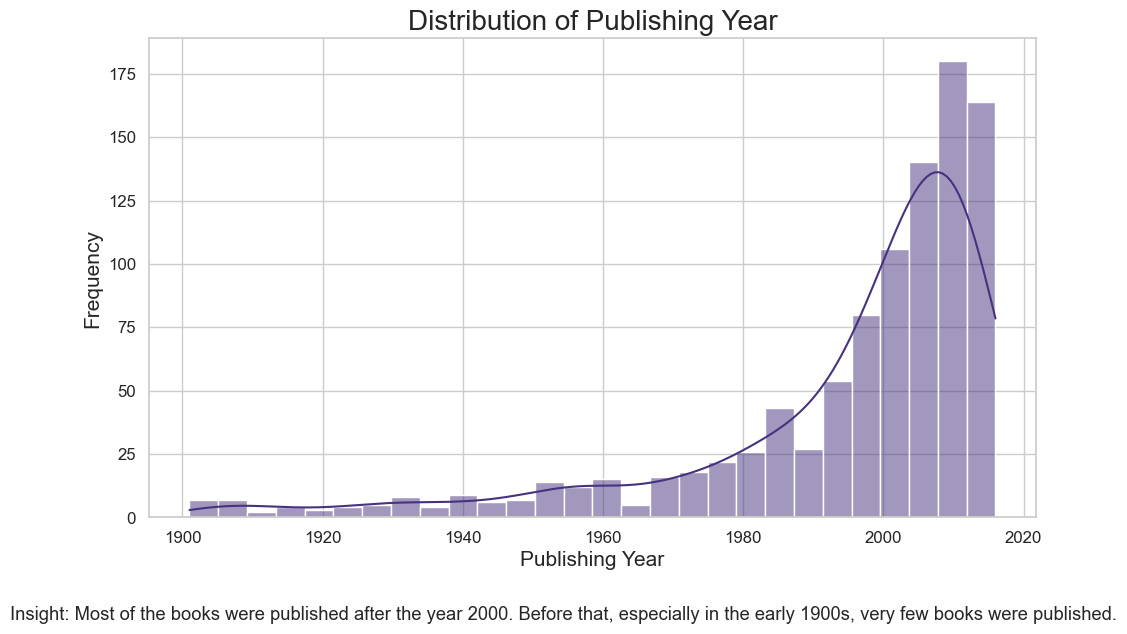

In [27]:
# Histogram

sns.histplot(x='Publishing Year',data=df,kde=True)
plt.title('Distribution of Publishing Year',fontsize=20)
plt.xlabel('Publishing Year',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.figtext(0.5, -0.05, 'Insight: Most of the books were published after the year 2000. Before that, especially in the early 1900s, very few books were published.'''
, ha='center')
plt.tight_layout()
plt.show()

# Distribution of Books by Language

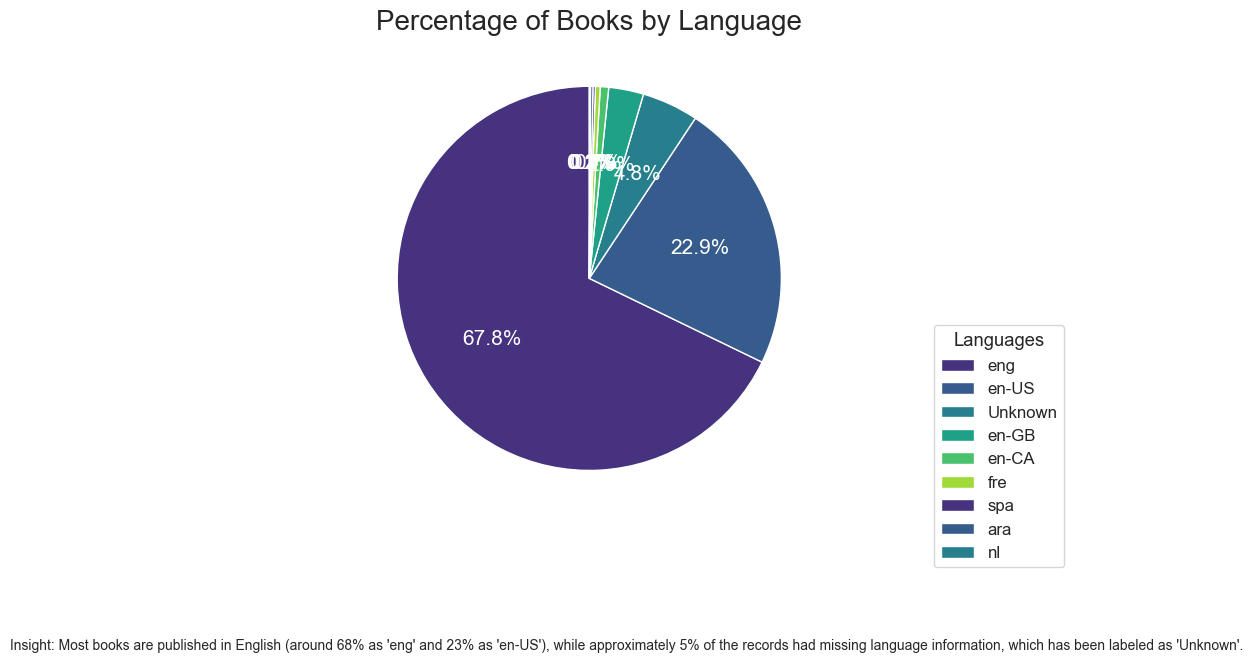

In [28]:
# Count of books by language
lang_counts= df['language_code'].value_counts()

# Pie chart
plt.pie(lang_counts, labels=None,autopct='%1.1f%%', startangle=90,textprops={'fontsize': 15,'color':'white'},)
plt.title('Percentage of Books by Language',fontsize=20)
plt.figtext(0.5, -0.1, "Insight: Most books are published in English (around 68% as 'eng' and 23% as 'en-US'), while approximately 5% of the records had missing language information, which has been labeled as 'Unknown'.", ha='center', fontsize=10)
plt.legend(lang_counts.index, title="Languages", loc="center left", bbox_to_anchor=(1.2, 0, 2, 0.3))
plt.tight_layout()
plt.show()

In [29]:
# Check the Genre of Books
df['genre'].unique()

array(['genre fiction', 'fiction', 'nonfiction', 'children'], dtype=object)

In [30]:
# Change 'Genre fiction' into 'Fiction' Because both are same
df['genre']=df['genre'].replace({'genre fiction':'fiction'})
df['genre']=df['genre'].str.title()

# Number of Books in Each Genre

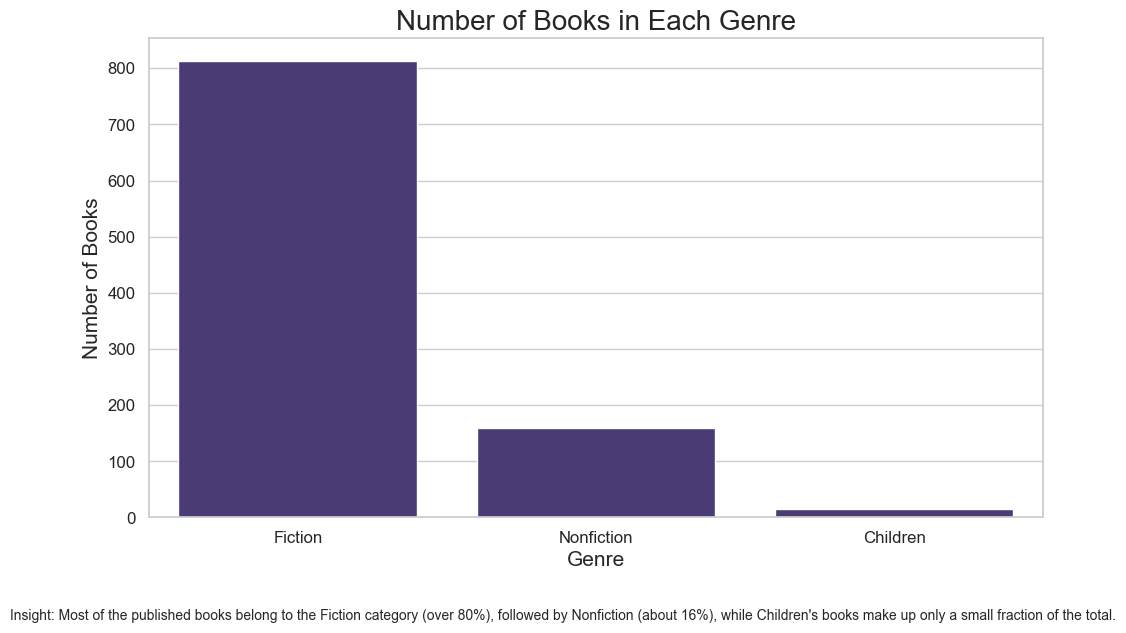

In [31]:
#Plot
sns.countplot(x='genre',data=df)
plt.title('Number of Books in Each Genre',fontsize=20)
plt.xlabel('Genre',fontsize=15)
plt.xticks(rotation=0)
plt.ylabel('Number of Books',fontsize=15)
plt.figtext(0.5, -0.05, "Insight: Most of the published books belong to the Fiction category (over 80%), followed by Nonfiction (about 16%), while Children's books make up only a small fraction of the total.", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Books Published by Each Publisher

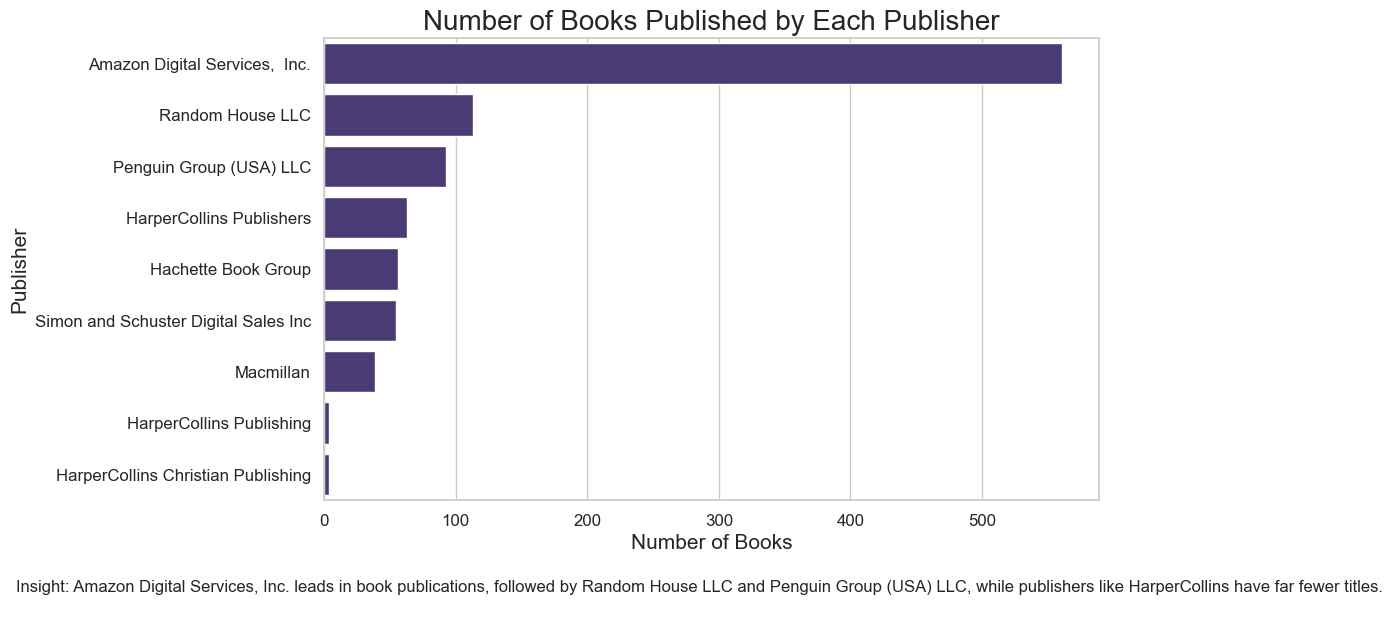

In [32]:
# Sort the data so the highest values appear at the top.
sort=df['Publisher '].value_counts().index

# Plot
sns.countplot(y='Publisher ',data=df,order=sort)
plt.ylabel("Publisher",fontsize=15)
plt.xlabel("Number of Books",fontsize=15)
plt.title("Number of Books Published by Each Publisher",fontsize=20)
plt.figtext(0.5, -0.1, '''Insight: Amazon Digital Services, Inc. leads in book publications, followed by Random House LLC and Penguin Group (USA) LLC, while publishers like HarperCollins have far fewer titles.

''', ha='center', fontsize=12)
plt.show()

# Number of Books Across Different Author Ratings

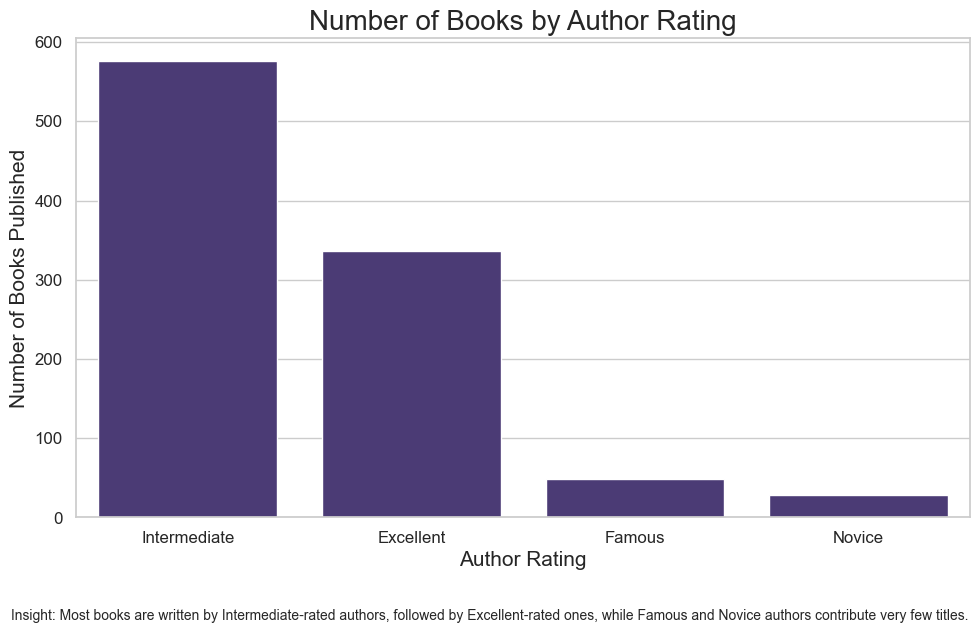

In [33]:
# Sort the data so the highest values appear at the top.
sort_rating=df['Author_Rating'].value_counts().index

# Plot
sns.countplot(x='Author_Rating',data=df,order=sort_rating)
plt.title('Number of Books by Author Rating',fontsize=20)
plt.xlabel('Author Rating',fontsize=15)
plt.ylabel('Number of Books Published',fontsize=15)
plt.figtext(0.5, -0.05, "Insight: Most books are written by Intermediate-rated authors, followed by Excellent-rated ones, while Famous and Novice authors contribute very few titles.", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Distribution of Books Based on Average Ratings

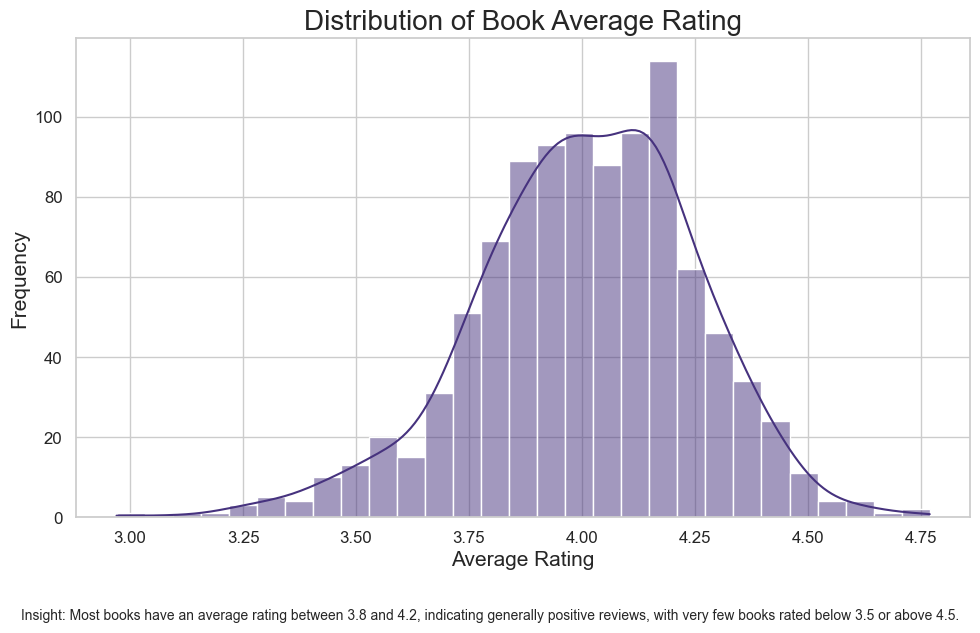

In [34]:
# Histogram
sns.histplot(x='Book_average_rating',data=df,kde=True)
plt.title('Distribution of Book Average Rating',fontsize=20)
plt.xlabel('Average Rating',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.figtext(0.5, -0.05, 'Insight: Most books have an average rating between 3.8 and 4.2, indicating generally positive reviews, with very few books rated below 3.5 or above 4.5.'
, ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Total Number of Units Sold for Each Language

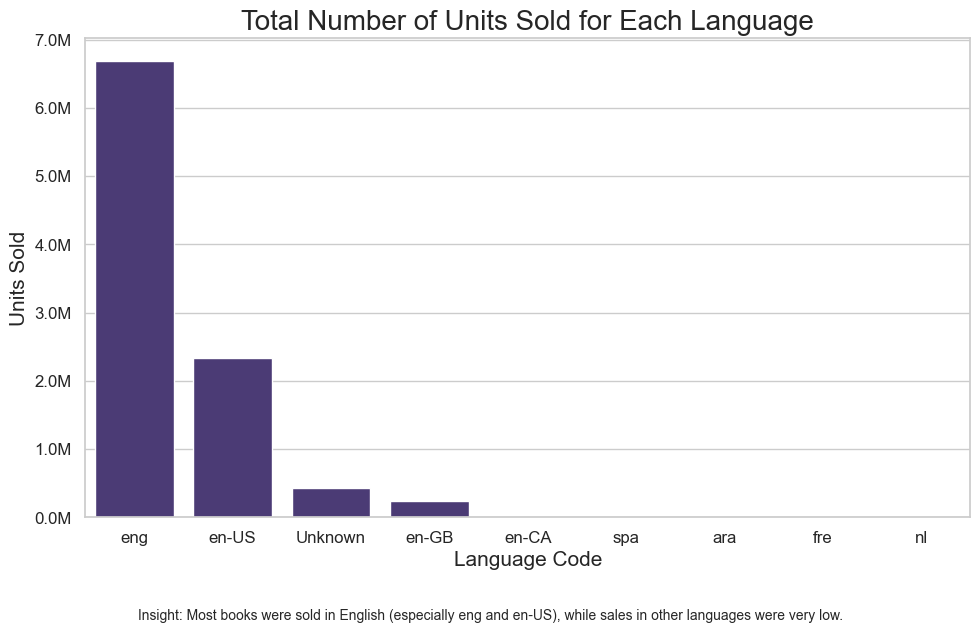

In [35]:
# Create a  Funtion to Change a Axis Values in Million
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    return f'{x/1e6:.1f}M'

# Group & sort the Data
sales_data=df.groupby('language_code',as_index=False)['units sold'].sum().sort_values(by='units sold',ascending=False)

# Plot
plot = sns.barplot(x='language_code',y='units sold',data=sales_data, estimator=sum,errorbar=None)
plt.title('Total Number of Units Sold for Each Language',fontsize=20)
plt.xlabel('Language Code',fontsize=15)
plt.ylabel('Units Sold',fontsize=15)
plot.yaxis.set_major_formatter(FuncFormatter(millions))
plt.figtext(0.5, -0.05, 'Insight: Most books were sold in English (especially eng and en-US), while sales in other languages were very low.'
, ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Sales Trend

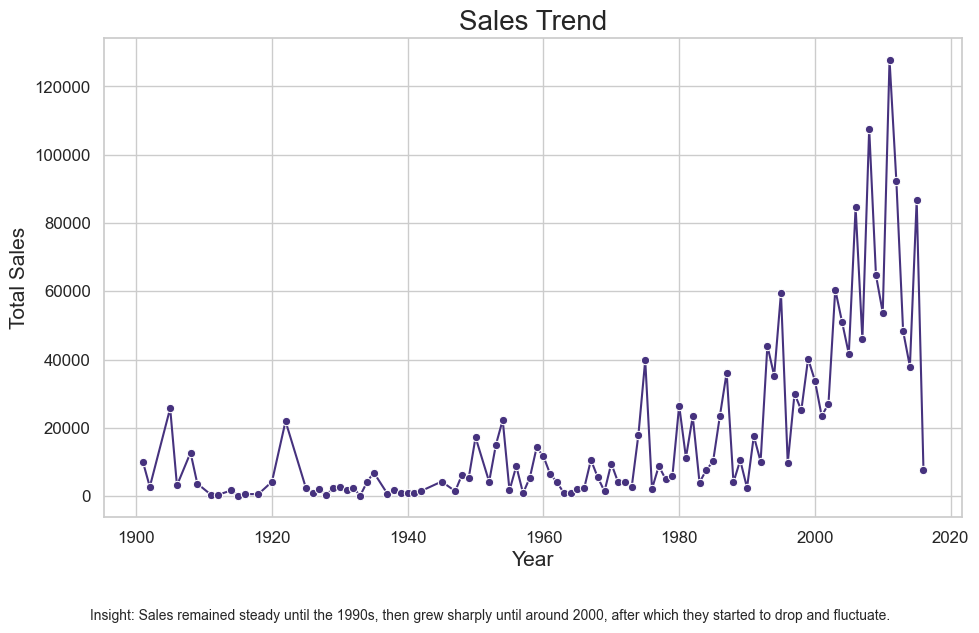

In [36]:
# Group the data to Year wise
yearly_sales = df.groupby('Publishing Year')['gross sales'].sum().reset_index()

# PLot
sns.lineplot(x='Publishing Year',y='gross sales',data=yearly_sales,marker='o')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)
plt.title('Sales Trend',fontsize=20)
plt.figtext(0.5, -0.05, 'Insight: Sales remained steady until the 1990s, then grew sharply until around 2000, after which they started to drop and fluctuate.'
, ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Total Units Sold By Publisher

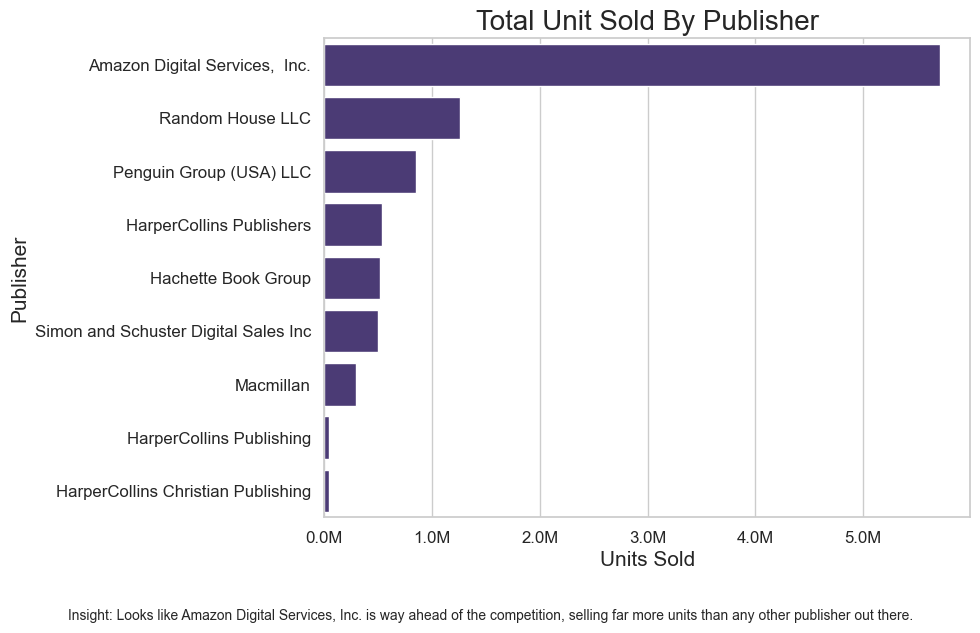

In [37]:
# Group & sort the Data
sort_by_publisher=df.groupby('Publisher ',as_index=False)['units sold'].sum().sort_values(by='units sold',ascending=False)
# Plot
plot1=sns.barplot(y='Publisher ',x='units sold',data=sort_by_publisher,orient='h')
plot1.xaxis.set_major_formatter(FuncFormatter(millions))
plt.title('Total Unit Sold By Publisher',fontsize=20)
plt.xlabel('Units Sold',fontsize=15)
plt.ylabel('Publisher',fontsize=15)
plt.figtext(0.5, -0.05, 'Insight: Looks like Amazon Digital Services, Inc. is way ahead of the competition, selling far more units than any other publisher out there.'
, ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Units Sold Across Different Author Rating

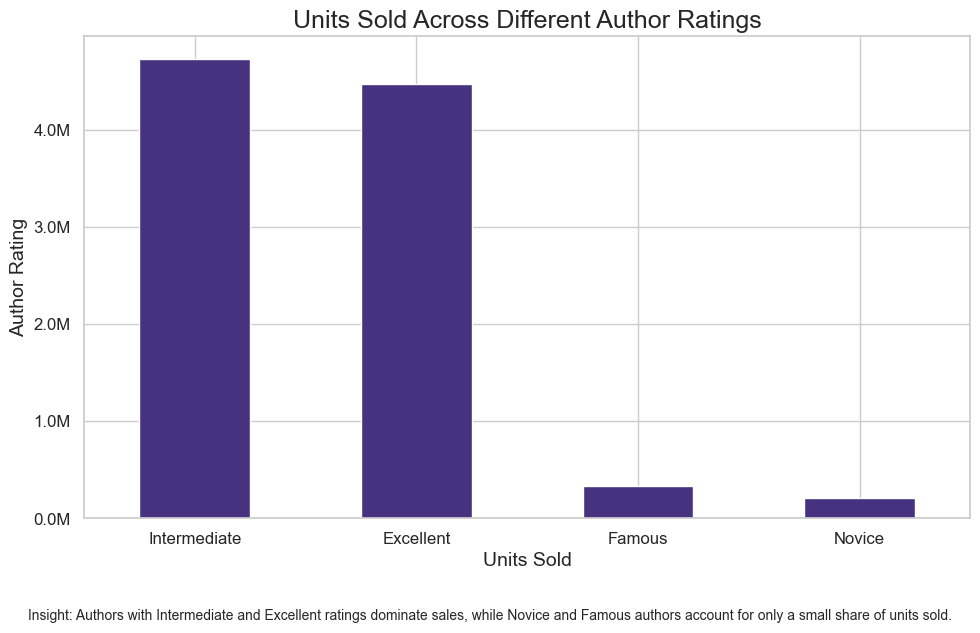

In [38]:
#Plot
plot2=df.groupby('Author_Rating')['units sold'].sum().sort_values(ascending=False).plot(kind='bar')
plot2.yaxis.set_major_formatter(FuncFormatter(millions))
plt.title('Units Sold Across Different Author Ratings',fontsize=18)
plt.xlabel('Units Sold',fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Author Rating',fontsize=14)
plt.figtext(0.5, -0.05, 'Insight: Authors with Intermediate and Excellent ratings dominate sales, while Novice and Famous authors account for only a small share of units sold.'
, ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Total Sales By Each Genre

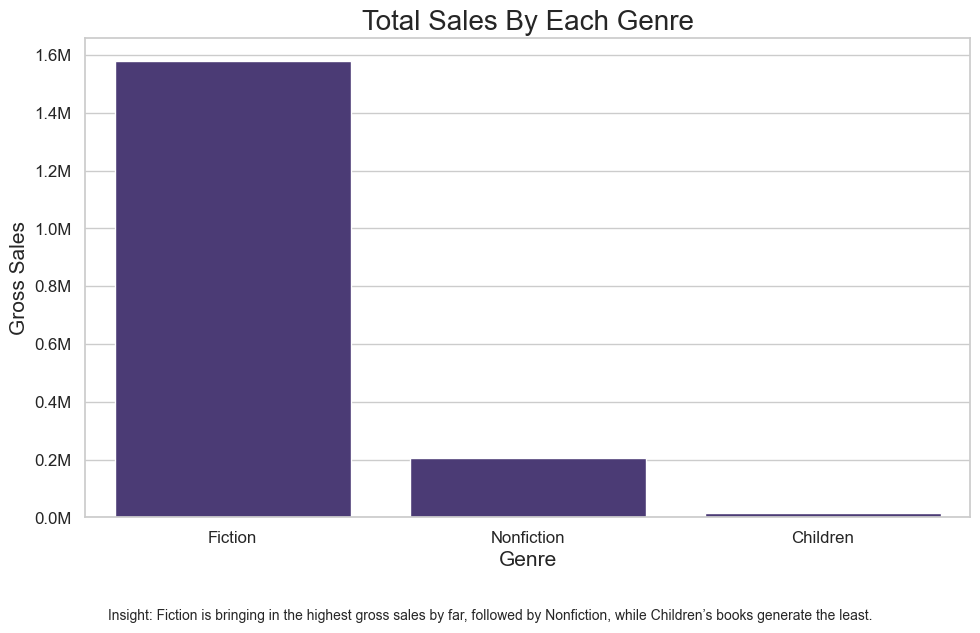

In [39]:
sort=df.groupby('genre', as_index=False)['gross sales'].sum().sort_values(by='gross sales',ascending=False)
plot3=sns.barplot(x='genre',y='gross sales',data=sort)
plot3.yaxis.set_major_formatter(FuncFormatter(millions))
plt.title('Total Sales By Each Genre',fontsize=20)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Gross Sales',fontsize=15)
plt.figtext(0.5, -0.05, 'Insight: Fiction is bringing in the highest gross sales by far, followed by Nonfiction, while Children’s books generate the least.'
, ha='center', fontsize=10)
plt.tight_layout()
plt.show()

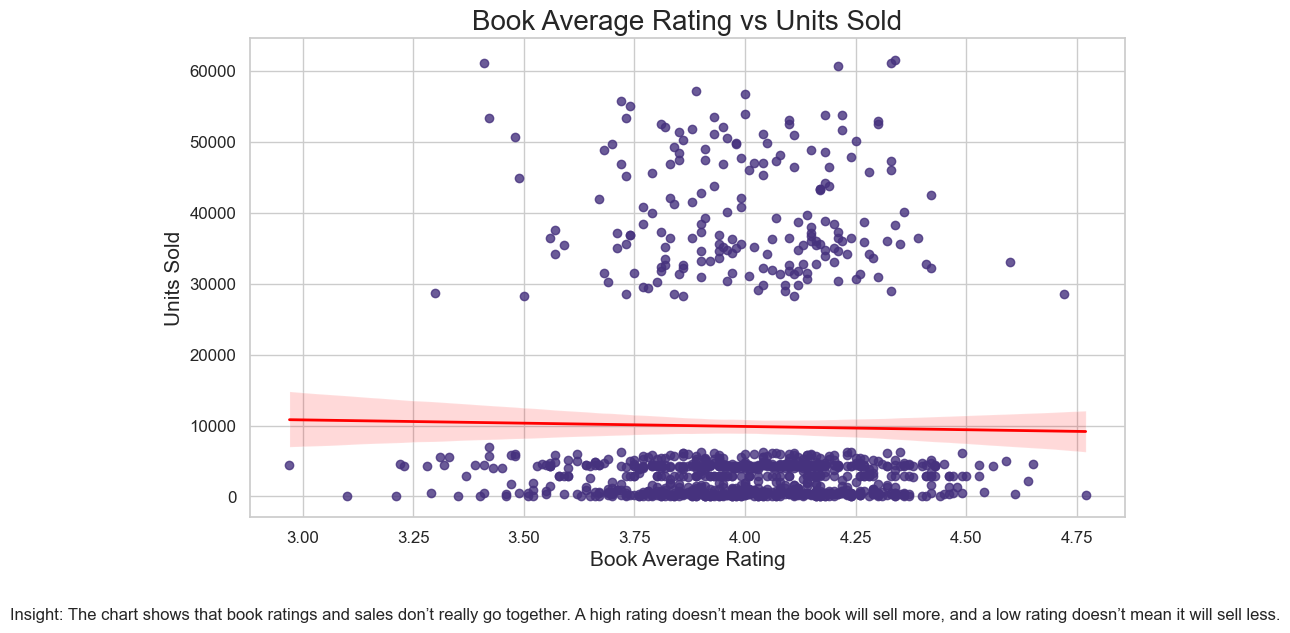

In [44]:
# Scatter Plot
sns.regplot(x='Book_average_rating',y='units sold',data=df,line_kws={'color':'red', 'linewidth':2})
plt.title("Book Average Rating vs Units Sold", fontsize=20)
plt.xlabel("Book Average Rating",fontsize=15)
plt.ylabel("Units Sold",fontsize=15)
plt.figtext(0.5, -0.05, 'Insight: The chart shows that book ratings and sales don’t really go together. A high rating doesn’t mean the book will sell more, and a low rating doesn’t mean it will sell less.'
, ha='center', fontsize=12)
plt.tight_layout()
plt.show()

In [41]:
# Calculate values to confirm whether there is no relationship between rating and units sold
corr = df['Book_average_rating'].corr(df['units sold'])
print("Correlation Coefficient:", corr)
print(f"The correlation coefficient is {corr:.2f}. Since this value is very close to 0, it suggests there is no meaningful relationship between a book's average rating and the number of units sold.")

Correlation Coefficient: -0.014723158455247238
The correlation coefficient is -0.01. Since this value is very close to 0, it suggests there is no meaningful relationship between a book's average rating and the number of units sold.


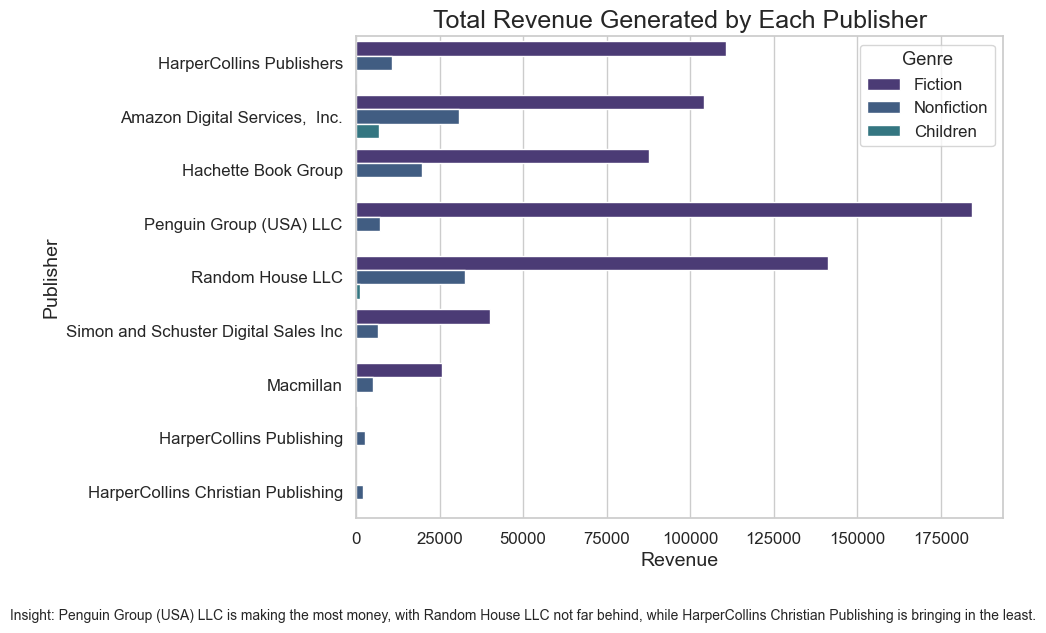

In [42]:
sns.barplot(x='publisher revenue',y='Publisher ',data=df,estimator=sum,hue='genre',errorbar=None)
plt.title('Total Revenue Generated by Each Publisher',fontsize=18)
plt.xlabel('Revenue',fontsize=14)
plt.ylabel('Publisher',fontsize=14)
plt.figtext(0.5, -0.05, 'Insight: Penguin Group (USA) LLC is making the most money, with Random House LLC not far behind, while HarperCollins Christian Publishing is bringing in the least.'
, ha='center', fontsize=10)
plt.tight_layout()
plt.legend(title='Genre')
plt.show()

# Conclusion

In [43]:
print('''
Final Conclusion:

1. Amazon Digital Services, Inc. is clearly the top publisher with the highest number of books and sales revenue.
2. Random House LLC and Penguin Group (USA) LLC also have a strong presence but are far behind Amazon in sales.
3. Some big publishers like HarperCollins Publishing and HarperCollins Christian Publishing have surprisingly low numbers.
4. There is no clear link between a book’s average rating and its sales — high ratings don't always mean more sales.
5. Fiction and Non-Fiction are the most popular genres, dominating the market.
6. English is the main publishing language, with other languages having a very small share.
7. Overall, the analysis shows the leading publishers, popular genres, and how language and ratings affect the market.
''')



Final Conclusion:

1. Amazon Digital Services, Inc. is clearly the top publisher with the highest number of books and sales revenue.
2. Random House LLC and Penguin Group (USA) LLC also have a strong presence but are far behind Amazon in sales.
3. Some big publishers like HarperCollins Publishing and HarperCollins Christian Publishing have surprisingly low numbers.
4. There is no clear link between a book’s average rating and its sales — high ratings don't always mean more sales.
5. Fiction and Non-Fiction are the most popular genres, dominating the market.
6. English is the main publishing language, with other languages having a very small share.
7. Overall, the analysis shows the leading publishers, popular genres, and how language and ratings affect the market.

